# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [19]:
# stundent details example: John S. 9812
#                       student details 1: Bar A. 3368
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chat GPT
Goal: Receive guidance and help for complex steps
Propmpt1: "Clarify what GridSearchCV is and how to use it to compare RandomForest hyperparameters (n_estimators, max_depth) with F1 scoring."
Propmpt2: "Explain how 5-fold stratified cross-validation works and how to set it with scoring f1 in my existing pipeline."
Propmpt3: "Show how to toggle StandardScaler vs. no scaling in a ColumnTransformer."


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

This project predicts whether a Titanic passenger survived. It is a supervised binary classification problem. The dataset has one row per passenger with basic details such as ticket class, sex, age, family on board, ticket price, and port of embarkation. Some values are missing, so I did a small cleanup and convert categories to numbers. We then train a model to learn survival patterns and evaluate it with the F1 metric.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [20]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.base import clone

RANDOM_STATE = 42
pd.set_option('display.max_columns', None)

In [21]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

display(train.head())
display(test.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [22]:
display(train.describe(include='all'))


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


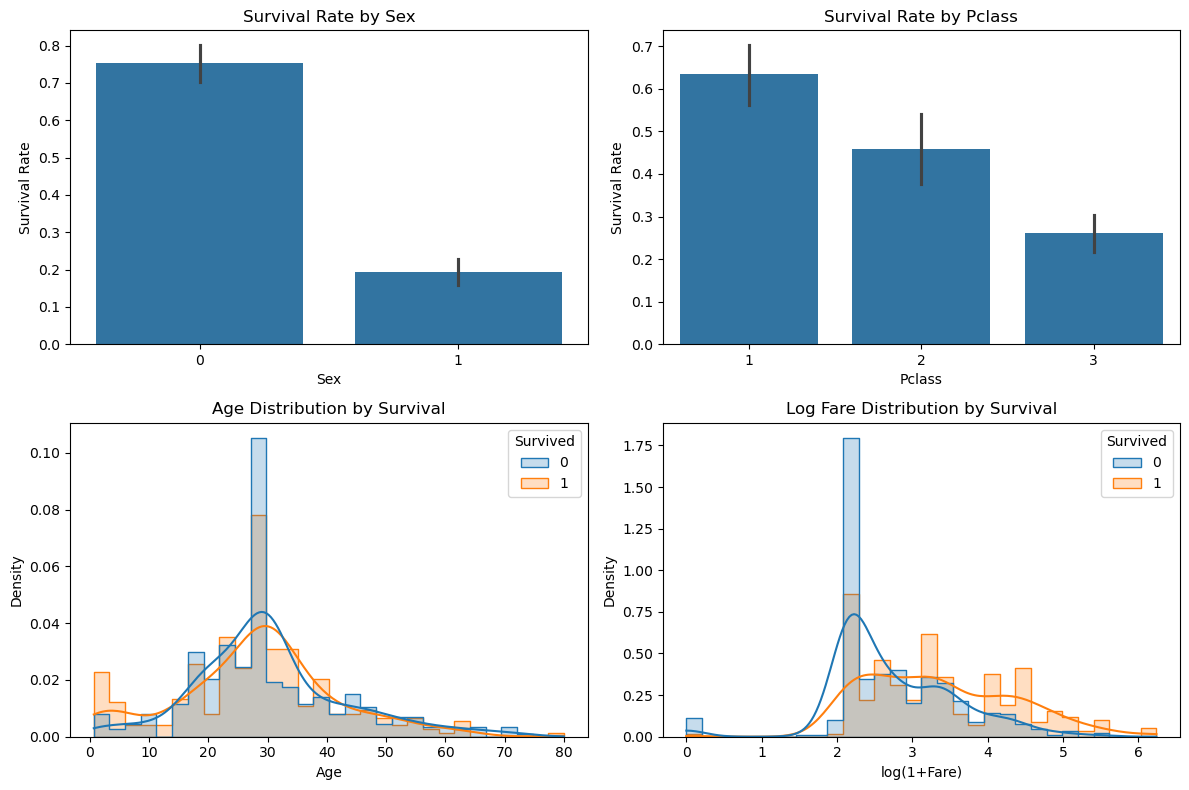

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(data=train, x='Sex', y='Survived', estimator=np.mean, ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Sex')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].set_xlabel('Sex')

sns.barplot(data=train, x='Pclass', y='Survived', estimator=np.mean, ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Pclass')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].set_xlabel('Pclass')

sns.histplot(data=train, x='Age', hue='Survived', bins=30, stat='density', common_norm=False, kde=True, element='step', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Density')

df_plot = train[['Fare','Survived']].copy()
df_plot['Fare_log'] = np.log1p(df_plot['Fare'])
sns.histplot(data=df_plot, x='Fare_log', hue='Survived', bins=30, stat='density', common_norm=False, kde=True, element='step', ax=axes[1,1])
axes[1,1].set_title('Log Fare Distribution by Survival')
axes[1,1].set_xlabel('log(1+Fare)')
axes[1,1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [53]:
print(train.groupby('Sex')['Survived'].mean().round(3))
print(train.groupby('Pclass')['Survived'].mean().round(3).sort_index())


Sex
0    0.754
1    0.193
Name: Survived, dtype: float64
Pclass
1    0.635
2    0.459
3    0.260
Name: Survived, dtype: float64


## Part 3 - Experiments
You could add as many code cells as needed

In [54]:
target_col = 'Survived'
feature_cols = [c for c in train.columns if c != target_col]

X = train[feature_cols].copy()
y = train[target_col].copy()

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()


In [55]:
numeric_transform_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_transform_none = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [56]:
preprocess_standard = ColumnTransformer(
    transformers=[
        ('num', numeric_transform_standard, numeric_features),
        ('cat', categorical_transform, categorical_features)
    ],
    remainder='drop'
)

preprocess_none = ColumnTransformer(
    transformers=[
        ('num', numeric_transform_none, numeric_features),
        ('cat', categorical_transform, categorical_features)
    ],
    remainder='drop'
)


In [57]:
pipe = Pipeline(steps=[
    ('preprocess', preprocess_standard),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'preprocess': [preprocess_standard, preprocess_none],
        'clf': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [5, 10]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    refit=True,
    return_train_score=True
)

grid.fit(X, y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_fre...
                                                                                                         sparse_output=False))]),
                                                                          [])]),
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer())]),
                                                                          ['Pclass',
                                                                           'Sex',
                                                                           'Age',
                                                                           'SibSp',
                                                                           'Parch',
                                                                           'Fare',
                                                                           'Embarked']),
                                                                         ('cat',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                          ('ohe',
                                                                                           OneHotEncoder(handle_unknown='ignore',
                                                                                                         sparse_output=False))]),
                                                                          [])])]}],
             return_train_score=True, scoring='f1')

In [58]:
cv_results = pd.DataFrame(grid.cv_results_)
cols_to_show = [
    'rank_test_score', 'mean_test_score', 'std_test_score',
    'mean_train_score', 'std_train_score', 'params'
]
display(cv_results[cols_to_show].sort_values('rank_test_score').reset_index(drop=True))

best_model = grid.best_estimator_
best_params = grid.best_params_
best_cv_f1 = grid.best_score_

print('Best params:', best_params)
print('Best CV F1:', round(best_cv_f1, 4))


,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,params
0,1,0.755259,0.023744,0.804875,0.006640,{'clf': RandomForestClassifier(random_state=42...
1,2,0.753892,0.024070,0.804496,0.007261,{'clf': RandomForestClassifier(random_state=42...
2,3,0.751932,0.032526,0.932709,0.005547,{'clf': RandomForestClassifier(random_state=42...
3,4,0.750108,0.027061,0.932709,0.005547,{'clf': RandomForestClassifier(random_state=42...
4,5,0.746572,0.028900,0.933765,0.004297,{'clf': RandomForestClassifier(random_state=42...
5,6,0.744071,0.032180,0.933765,0.004297,{'clf': RandomForestClassifier(random_state=42...
6,7,0.735070,0.019912,0.802826,0.005515,{'clf': RandomForestClassifier(random_state=42...
7,8,0.733678,0.020402,0.802829,0.006435,{'clf': RandomForestClassifier(random_state=42...


Best params: {'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': 5, 'clf__n_estimators': 100, 'preprocess': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                  'Fare', 'Embarked']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])}
Best CV F1: 0.7553


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [59]:
best_preprocess = preprocess_standard if grid.best_params_['preprocess'] is preprocess_standard else preprocess_none
best_n_estimators = grid.best_params_['clf__n_estimators']
best_max_depth = grid.best_params_['clf__max_depth']

final_model = Pipeline(steps=[
    ('preprocess', best_preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=RANDOM_STATE
    ))
])

final_model.fit(X, y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare',
                                                   'Embarked']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('clf', RandomForestClassifier(max_depth=5, random_state=42))])

In [60]:
print('preprocess:', 'with scaling' if grid.best_params_['preprocess'] is preprocess_standard else 'no scaling')
print('n_estimators:', final_model.get_params()['clf__n_estimators'])
print('max_depth:', final_model.get_params()['clf__max_depth'])
final_model


preprocess: with scaling
n_estimators: 100
max_depth: 5


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare',
                                                   'Embarked']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('clf', RandomForestClassifier(max_depth=5, random_state=42))])

## Part 5 - Apply on test and show model performance estimation

In [61]:
test_preds = final_model.predict(test[feature_cols])

pred_df = pd.DataFrame({
    'PassengerId': test['PassengerId'] if 'PassengerId' in test.columns else np.arange(1, len(test_preds)+1),
    'Survived': test_preds
})
display(pred_df.head())

pred_df.to_csv('titanic_predictions.csv', index=False)
print('Saved: titanic_predictions.csv')


,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


Saved: titanic_predictions.csv


In [62]:
if 'Survived' in test.columns:
    y_test = test['Survived'].values
    y_pred = test_preds
    f1 = f1_score(y_test, y_pred)
    print('Test F1:', round(f1, 4))
    print(classification_report(y_test, y_pred))
else:
    print('No ground-truth labels in test set. Reporting cross-validation performance instead.')
    print('Best CV F1:', round(best_cv_f1, 4))
    display(pred_df.head())


Test F1: 0.7863
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.82      0.75      0.79        61

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179

